In [3]:
import numpy as np

def monte_carlo_integration(f: callable, a: float, b: float, N: int) -> float:
    '''
    Funkcja szacuje całkę metodą Monte Carlo.
    
    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    N (int): Liczba losowych punktów.

    Zwraca:
    float: Przybliżona wartość całki.
    '''
    sum_f = 0
    x = np.random.uniform(a, b, N)
    sum_f += f(x)
    return (b - a) * np.mean(sum_f)

def f(x: np.ndarray) -> np.ndarray:
    '''
    Funkcja zwraca wartość funkcji 4 / (1 + x**2).
    
    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.
    
    Zwraca:
    np.ndarray: Tablica wartości funkcji 4 / (1 + x**2).
    '''
    return 4 / (1 + x**2)

# Definiowanie przedziału całkowania
a = 0
b = 1
# Liczba losowych punktów
N = 1000000

# Obliczanie wartości całki metodą Monte Carlo
integral_value = monte_carlo_integration(f, a, b, N)
print(f"Przybliżona wartość całki: {integral_value}")


Przybliżona wartość całki: 3.1417564523249535


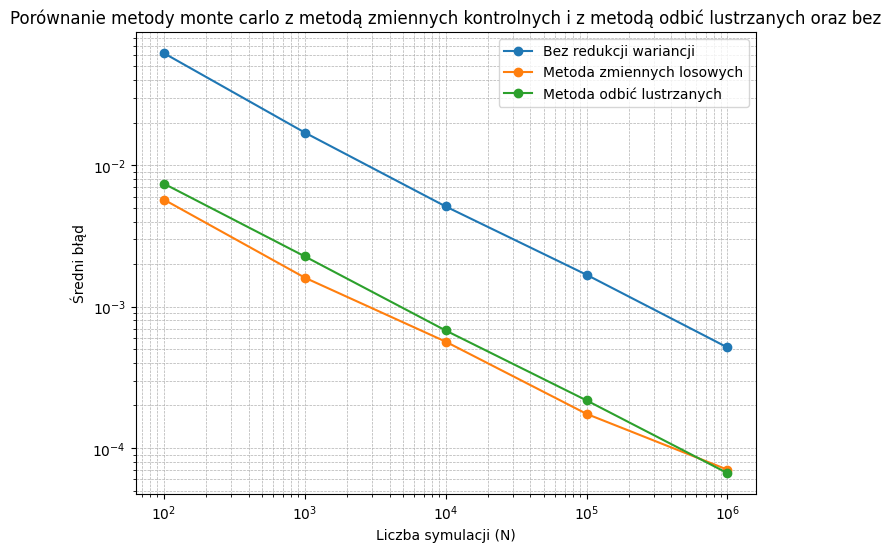

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_integration(f, a, b, N):
    x = np.random.uniform(a, b, N)
    return (b - a) * np.mean(f(x))

import numpy as np

def monte_carlo_integration_control_variate(f: callable, g: callable, a: float, b: float, n_samples: int) -> float:
    '''
    Funkcja szacuje całkę metodą Monte Carlo z kontrolną zmienną.

    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    g (callable): Funkcja pomocnicza (kontrolna zmienna).
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    n_samples (int): Liczba losowych próbek.

    Zwraca:
    float: Przybliżona wartość całki.
    '''
    samples = np.random.uniform(a, b, n_samples)
    f_values = f(samples)
    g_values = g(samples)
    
    mu_g = (b - a) * np.mean(g_values)
    
    cov_fg = np.cov(f_values, g_values)[0, 1]
    var_g = np.var(g_values)
    
    c = -cov_fg / var_g
    
    control_variate_values = f_values + c * (g_values - 3/2)
    control = np.mean(f_values) + c * (np.mean(g_values) - 3/2)
    integral_estimate = (b - a) * np.mean(control_variate_values)
    return control

def monte_carlo_integration_antithetic(f: callable, a: float, b: float, N: int) -> float:
    '''
    Funkcja szacuje całkę metodą Monte Carlo z użyciem metody odbić lustrzanych.

    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    N (int): Liczba losowych próbek.

    Zwraca:
    float: Przybliżona wartość całki.
    '''
    x = np.random.uniform(a, b, N // 2)
    x_mirror = 1 - x
    fx = f(x)
    fx_mirror = f(x_mirror)
    return (b - a) * np.mean((fx + fx_mirror) / 2)


def f(x: np.ndarray) -> np.ndarray:
    '''
    Funkcja, którą mamy scałkować
    
    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.
    
    Zwraca:
    np.ndarray: Tablica wartości funkcji 4 / (1 + x**2).
    '''
    return 4 / (1 + x**2)


def g(x: np.ndarray) -> np.ndarray:
    '''
    Funkcja użyta do metody zmiennej kontrolnej
    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.
    
    Zwraca:
    np.ndarray: Tablica wartości funkcji x+1
    '''
    return x+1

# wartość całki g(x) przy granicach a=0,b=1
integral_g = 3/2

# granice całkowania
a = 0
b = 1

# dokładna wartość całki z f(x)
exact_value = np.pi

# liczba symulacji
N_values = [100, 1000, 10000, 100000, 1000000]

mean_errors1 = np.zeros(len(N_values))
mean_errors2 = np.zeros(len(N_values))
mean_errors3 = np.zeros(len(N_values))

for idx, N in enumerate(N_values):
    errors1 = np.zeros(100)
    errors2 = np.zeros(100)
    errors3 = np.zeros(100)
    for i in range(100):
        approx_value1 = monte_carlo_integration(f, a, b, N)
        approx_value2 = monte_carlo_integration_control_variate(f, g, a, b, N)
        approx_value3 = monte_carlo_integration_antithetic(f, a, b, N)
        error1 = abs(approx_value1 - exact_value)
        error2 = abs(approx_value2 - exact_value)
        error3 = abs(approx_value3 - exact_value)
        errors1[i] = error1
        errors2[i] = error2
        errors3[i] = error3
    mean_errors1[idx] = np.mean(errors1)
    mean_errors2[idx] = np.mean(errors2)
    mean_errors3[idx] = np.mean(errors3)

plt.figure(figsize=(8,6))
plt.loglog(N_values, mean_errors1, marker='o', label='Bez redukcji wariancji')
plt.loglog(N_values, mean_errors2, marker='o', label='Metoda zmiennych losowych')
plt.loglog(N_values, mean_errors3, marker='o', label='Metoda odbić lustrzanych')
plt.xlabel('Liczba symulacji (N)')
plt.ylabel('Średni błąd')
plt.title('Porównanie metody monte carlo z metodą zmiennych kontrolnych i z metodą odbić lustrzanych oraz bez')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
